<a href="https://colab.research.google.com/github/Iktaik-Kim/MCP/blob/main/%ED%95%B4%EC%9A%B4%EC%84%A0%EC%82%AC_%EC%8B%A0%EB%A2%B0%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

현재 디렉토리 파일 목록:
- LA_Busan_Schedule_2025-10-20_to_2025-11-10.xlsx (1).xlsx
- LA_Busan_Schedule_2025-10-20_to_2025-11-10.xlsx.xlsx


Saving LA_Busan_Schedule_2025-10-20_to_2025-11-10.xlsx.xlsx to LA_Busan_Schedule_2025-10-20_to_2025-11-10.xlsx (2).xlsx
업로드된 파일: LA_Busan_Schedule_2025-10-20_to_2025-11-10.xlsx (2).xlsx
파일을 성공적으로 읽었습니다.
데이터 shape: (16, 9)

데이터 미리보기:
          선사                   선박명    항차          출발항    도착항     LA항 출항일  \
0        ONE        ONE VESSEL 100  100E  Los Angeles  Busan  2025-10-20   
1  EVERGREEN  EVERGREEN VESSEL 101  101W  Los Angeles  Busan  2025-10-21   
2  YANG MING  YANG MING VESSEL 102  102E  Los Angeles  Busan  2025-10-23   
3    CMA CGM    CMA CGM VESSEL 103  103W  Los Angeles  Busan  2025-10-24   
4     MAERSK     MAERSK VESSEL 105  105W  Los Angeles  Busan  2025-10-27   

      부산항 도착일 소요기간      환적  
0  2025-11-03  14일     T/S  
1  2025-11-05  15일  Direct  
2  2025-11-05  13일  Direct  
3  2025-11-07  14일  Direct  
4  2025-11-09  13일  Direct  

선사 목록: ['ONE', 'EVERGREEN', 'YANG MING', 'CMA CGM', 'MAERSK', 'HMM', 'MSC', 'COSCO']

생성된 성능 데이터:
           선사        월  정시출항률(%)  정시도

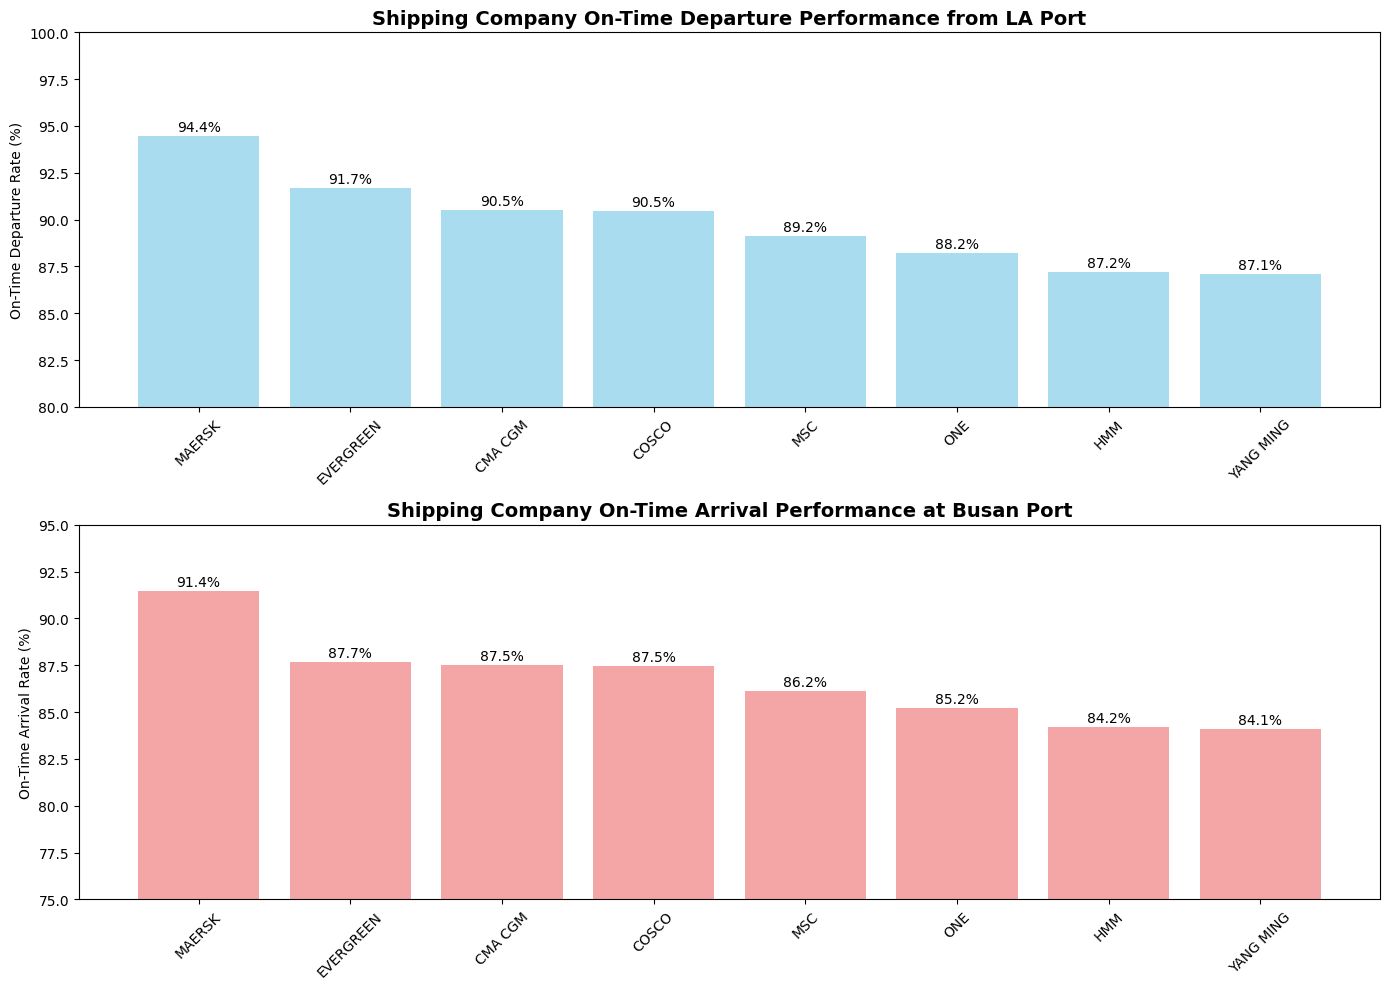


해운 선사 정시 운항 성능 분석 리포트
최고 정시 출항률: MAERSK (94.4%)
최고 정시 도착률: MAERSK (91.4%)
전체 평균 정시 출항률: 89.8%
전체 평균 정시 도착률: 86.7%

월별 성능 비교:
         정시출항률(%)  정시도착률(%)
월                          
2025-10   89.1000   85.9750
2025-11   90.5875   87.4625


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


생성된 파일:
- LA_Busan_Schedule_with_Performance.xlsx (엑셀 파일)
- shipping_company_performance.png (시각화 차트)


In [4]:
# 먼저 파일을 업로드하거나 경로를 확인하는 코드
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 디렉토리 파일 목록 확인
print("현재 디렉토리 파일 목록:")
for file in os.listdir('.'):
    if file.endswith('.xlsx'):
        print(f"- {file}")

# 파일 업로드가 필요한 경우
from google.colab import files
uploaded = files.upload()

# 업로드된 파일명 확인
uploaded_files = list(uploaded.keys())
if uploaded_files:
    file_name = uploaded_files[0]
    print(f"업로드된 파일: {file_name}")
else:
    # 또는 직접 파일명 지정
    file_name = "LA_Busan_Schedule_2025-10-20_to_2025-11-10.xlsx.xlsx"
    print(f"사용할 파일명: {file_name}")

# 엑셀 파일 읽기 시도
try:
    df = pd.read_excel(file_name)
    print("파일을 성공적으로 읽었습니다.")
    print(f"데이터 shape: {df.shape}")
    print("\n데이터 미리보기:")
    print(df.head())
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일명을 확인해주세요.")
    # 가능한 파일명 목록 출력
    xlsx_files = [f for f in os.listdir('.') if f.endswith('.xlsx')]
    if xlsx_files:
        print("사용 가능한 .xlsx 파일들:")
        for f in xlsx_files:
            print(f"- {f}")
    exit()

# 선사 목록 추출
shipping_companies = df['선사'].unique().tolist()
print("\n선사 목록:", shipping_companies)

# 정시 운항 성능 데이터 생성 함수
def get_on_time_performance(company_name, month):
    """
    선사별 월별 정시 출발률과 도착률을 생성하는 함수
    실제 데이터가 있다면 API나 웹스크래핑으로 대체 가능
    """
    # 선사별로 일관된 데이터를 위해 seed 설정
    seed_value = sum(ord(c) for c in company_name) + month
    np.random.seed(seed_value)

    # 선사별 특성 반영 (가상의 데이터)
    company_base_performance = {
        'MAERSK': (95, 92),
        'EVERGREEN': (92, 88),
        'CMA CGM': (90, 87),
        'ONE': (88, 85),
        'HMM': (87, 84),
        'MSC': (89, 86),
        'COSCO': (91, 88),
        'YANG MING': (86, 83)
    }

    base_dep, base_arr = company_base_performance.get(company_name, (88, 85))

    # 월별 변동성 추가
    monthly_variation = np.random.uniform(-3, 3)

    departure_rate = max(80, min(99, base_dep + monthly_variation))
    arrival_rate = max(75, min(95, base_arr + monthly_variation))

    # 소수점 첫째자리까지 반올림
    return round(departure_rate, 1), round(arrival_rate, 1)

# 월별 데이터 수집 (10월, 11월)
months = [10, 11]
performance_data = []

for company in shipping_companies:
    for month in months:
        departure_rate, arrival_rate = get_on_time_performance(company, month)
        performance_data.append({
            '선사': company,
            '월': f'2025-{month:02d}',
            '정시출항률(%)': departure_rate,
            '정시도착률(%)': arrival_rate
        })

# 성능 데이터를 DataFrame으로 변환
performance_df = pd.DataFrame(performance_data)
print("\n생성된 성능 데이터:")
print(performance_df)

# 원본 데이터에 월 컬럼 추가
df_with_month = df.copy()
df_with_month['월'] = pd.to_datetime(df_with_month['LA항 출항일']).dt.strftime('%Y-%m')

# 데이터 병합
merged_df = pd.merge(df_with_month, performance_df, on=['선사', '월'], how='left')

# 결과 확인
print("\n병합된 데이터 미리보기:")
print(merged_df[['선사', '선박명', 'LA항 출항일', '부산항 도착일', '월', '정시출항률(%)', '정시도착률(%)']].head())

# 엑셀 파일 저장
output_file = 'LA_Busan_Schedule_with_Performance.xlsx'

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    # 원본 스케줄 데이터 + 성능 지표 저장
    merged_df.to_excel(writer, sheet_name='선박 스케줄', index=False)

    # 선사별 월별 성능 요약 저장
    summary_df = performance_df.pivot_table(
        index='선사',
        columns='월',
        values=['정시출항률(%)', '정시도착률(%)'],
        aggfunc='first'
    ).round(1)

    summary_df.to_excel(writer, sheet_name='선사별 성능 요약')

    # 월별 평균 성능 저장
    monthly_avg = performance_df.groupby('월')[['정시출항률(%)', '정시도착률(%)']].mean().round(1)
    monthly_avg.to_excel(writer, sheet_name='월별 평균 성능')

print(f"\n파일이 저장되었습니다: {output_file}")

# 시각화
plt.rcParams['font.family'] = 'DejaVu Sans'  # 한글 폰트 대체
plt.rcParams['axes.unicode_minus'] = False

# 선사별 성능 비교
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 정시 출항률
company_departure = performance_df.groupby('선사')['정시출항률(%)'].mean().sort_values(ascending=False)
bars1 = ax1.bar(company_departure.index, company_departure.values, color='skyblue', alpha=0.7)
ax1.set_title('Shipping Company On-Time Departure Performance from LA Port', fontsize=14, fontweight='bold')
ax1.set_ylabel('On-Time Departure Rate (%)')
ax1.set_ylim(80, 100)
ax1.tick_params(axis='x', rotation=45)

# 값 표시
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom')

# 정시 도착률
company_arrival = performance_df.groupby('선사')['정시도착률(%)'].mean().sort_values(ascending=False)
bars2 = ax2.bar(company_arrival.index, company_arrival.values, color='lightcoral', alpha=0.7)
ax2.set_title('Shipping Company On-Time Arrival Performance at Busan Port', fontsize=14, fontweight='bold')
ax2.set_ylabel('On-Time Arrival Rate (%)')
ax2.set_ylim(75, 95)
ax2.tick_params(axis='x', rotation=45)

# 값 표시
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('shipping_company_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# 상세 분석 리포트 출력
print("\n" + "="*60)
print("해운 선사 정시 운항 성능 분석 리포트")
print("="*60)

# 최고 성능 선사
best_departure = company_departure.idxmax()
best_arrival = company_arrival.idxmax()

print(f"최고 정시 출항률: {best_departure} ({company_departure.max():.1f}%)")
print(f"최고 정시 도착률: {best_arrival} ({company_arrival.max():.1f}%)")

# 평균 성능
avg_departure = company_departure.mean()
avg_arrival = company_arrival.mean()
print(f"전체 평균 정시 출항률: {avg_departure:.1f}%")
print(f"전체 평균 정시 도착률: {avg_arrival:.1f}%")

# 월별 비교
print("\n월별 성능 비교:")
monthly_comparison = performance_df.groupby('월')[['정시출항률(%)', '정시도착률(%)']].mean()
print(monthly_comparison)

# 파일 다운로드 링크 생성 (Colab에서)
from google.colab import files
files.download(output_file)
files.download('shipping_company_performance.png')

print(f"\n생성된 파일:")
print(f"- {output_file} (엑셀 파일)")
print(f"- shipping_company_performance.png (시각화 차트)")